# 로지스틱 회귀를 활용해
# 챔피언 조합을 넣으면 승률을 구해주는 함수 구현

In [1]:
#필요라이브러리 다운로드 
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform 

#한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

#그래프에서 마이너스 표시되게
matplotlib.rcParams['axes.unicode_minus']=False

import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import statsmodels.api as sm

# 1. 모델 피팅

In [2]:
# 데이터 로드 
df = pd.read_csv("master_logit.csv")
df

matchId  red_Aatrox  red_Ahri  red_Akali  red_Akshan  \
0      KR_4870274470           0         0          0           0   
1      KR_4901175026           0         0          1           0   
2      KR_4944273316           0         0          0           0   
3      KR_4944293028           0         0          0           0   
4      KR_4975317218           0         0          0           0   
...              ...         ...       ...        ...         ...   
25624  KR_5560971377           1         0          0           0   
25625  KR_5560971639           0         0          0           0   
25626  KR_5560972397           0         0          0           0   
25627  KR_5560981091           0         0          0           0   
25628  KR_5560981811           0         0          0           0   

       red_Alistar  red_Amumu  red_Anivia  red_Annie  red_Aphelios  ...  \
0                0          0           0          0             0  ...   
1                0          0           0          0             0  ...   
2                0          0           0          0             0  ...   
3                0          0           0          0             1  ...   
4                0          0           0          0             0  ...   
...            ...        ...         ...        ...           ...  ...   
25624            0          0           0          0             0  ...   
25625            0          0           0          0             0  ...   
25626            0          1           0          0             0  ...   
25627            0          0           0          0             0  ...   
25628            1          0           0          0             0  ...   

       blue_Yasuo  blue_Yone  blue_Yorick  blue_Yuumi  blue_Zac  blue_Zed  \
0               0          0            0           0         0         0   
1               0          0            0           0         0         0   
2               0          0            0           0         0         0   
3               0          0            0           0         0         0   
4               0          1            0           0         0         0   
...           ...        ...          ...         ...       ...       ...   
25624           0          0            0           0         0         0   
25625           0          0            0           0         0         0   
25626           0          0            0           0         1         0   
25627           0          0            0           0         0         0   
25628           0          0            0           0         0         0   

       blue_Ziggs  blue_Zilean  blue_Zoe  blue_Zyra  
0               0            0         0          0  
1               0            0         0          0  
2               0            0         0          0  
3               0            0         0          0  
4               0            0         0          0  
...           ...          ...       ...        ...  
25624           0            0         0          0  
25625           0            0         0          0  
25626           0            0         1          0  
25627           0            1         0          0  
25628           0            0         0          0  

[25629 rows x 316 columns]

In [3]:
data = df.drop(['win','matchId'], axis = 'columns')
label = df['win']
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state=11)

In [4]:
# 로지스틱 회귀 모델 생성
import statsmodels.api as sm
logit_m = sm.Logit(y_train, X_train)
logit_m_train = logit_m.fit(method='powell')

Optimization terminated successfully.
         Current function value: 0.680862
         Iterations: 4
         Function evaluations: 12425


In [5]:
Y_predict = logit_m_train.predict(X_test)
print(Y_predict)

16032    0.503460
10865    0.459792
12066    0.479242
20179    0.513547
14015    0.539894
           ...   
1832     0.639000
12830    0.433377
19480    0.395163
22757    0.566262
8126     0.525892
Length: 7689, dtype: float64


<AxesSubplot:>

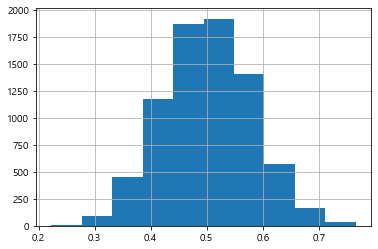

In [6]:
Y_predict.hist()

In [7]:
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

Y_predict_t = cut_off(Y_predict,0.5)

accuracy = accuracy_score(y_test, Y_predict_t)
print('Accuracy : {0:.3f}'.format(accuracy))

Accuracy : 0.527


# 2. 어떤 조합이 승률이 가장 높을까?

In [8]:
combined_df = pd.concat([X_test, y_test,Y_predict], axis=1) 

In [9]:
# 승률이 좋은 조합 출력
bestcombination = combined_df.loc[combined_df[0] > 0.753035 ]
bestcombination.index

Int64Index([22838, 21611, 17104, 23540], dtype='int64')

In [10]:
bestcombination = combined_df.loc[17104]
print('가장 승률이 좋은 조합 TOP 1') 
print('승률: ',bestcombination[0])
print (bestcombination.loc[bestcombination == 1])

가장 승률이 좋은 조합 TOP 1
승률:  0.7659320301466159
red_Elise       1.0
red_Leblanc     1.0
red_Sivir       1.0
red_Sylas       1.0
red_Tristana    1.0
blue_Ashe       1.0
blue_Illaoi     1.0
blue_Khazix     1.0
blue_Poppy      1.0
blue_Sona       1.0
Name: 17104, dtype: float64


In [11]:
bestcombination = combined_df.loc[23540]
print('가장 승률이 좋은 조합 TOP 2') 
print('승률: ',bestcombination[0])
print (bestcombination.loc[bestcombination == 1])

가장 승률이 좋은 조합 TOP 2
승률:  0.7630345603509479
red_Akali          1.0
red_Aphelios       1.0
red_Hecarim        1.0
red_Thresh         1.0
red_Urgot          1.0
blue_Aatrox        1.0
blue_Blitzcrank    1.0
blue_Fizz          1.0
blue_Jinx          1.0
blue_Khazix        1.0
win                1.0
Name: 23540, dtype: float64


In [12]:
bestcombination = combined_df.loc[21611]
print('가장 승률이 좋은 조합 TOP 3') 
print('승률: ',bestcombination[0])
print (bestcombination.loc[bestcombination == 1])

가장 승률이 좋은 조합 TOP 3
승률:  0.7558024776249191
red_Corki       1.0
red_Jinx        1.0
red_Katarina    1.0
red_Lucian      1.0
red_Ryze        1.0
blue_Brand      1.0
blue_LeeSin     1.0
blue_Sona       1.0
blue_Vex        1.0
blue_Yasuo      1.0
win             1.0
Name: 21611, dtype: float64


In [13]:
bestcombination = combined_df.loc[22838]
print('가장 승률이 좋은 조합 TOP 4') 
print('승률: ',bestcombination[0])
print (bestcombination.loc[bestcombination == 1])

가장 승률이 좋은 조합 TOP 4
승률:  0.7569764333155355
red_Graves       1.0
red_Gwen         1.0
red_MasterYi     1.0
red_Seraphine    1.0
red_Shaco        1.0
blue_Ashe        1.0
blue_Braum       1.0
blue_Maokai      1.0
blue_Samira      1.0
blue_Sona        1.0
win              1.0
Name: 22838, dtype: float64


In [14]:
# 승률이 나쁜 조합 출력
bestcombination = combined_df.loc[combined_df[0] < 0.24 ]
bestcombination.index

Int64Index([24238, 17957, 18756], dtype='int64')

In [15]:
worstcombination = combined_df.loc[24238]
print('가장 승률이 나쁜 조합 TOP 1')
print('승률: ',worstcombination[0])
print (worstcombination.loc[worstcombination == 1])

가장 승률이 나쁜 조합 TOP 1
승률:  0.22293230160297328
red_Ezreal           1.0
red_Illaoi           1.0
red_Kindred          1.0
red_Leona            1.0
red_Lillia           1.0
blue_Akali           1.0
blue_Gnar            1.0
blue_Heimerdinger    1.0
blue_Yasuo           1.0
blue_Zed             1.0
Name: 24238, dtype: float64


In [16]:
worstcombination = combined_df.loc[18756]
print('가장 승률이 나쁜 조합 TOP 2')
print('승률: ',worstcombination[0])
print (worstcombination.loc[worstcombination == 1])

가장 승률이 나쁜 조합 TOP 2
승률:  0.22553716675763127
red_Ashe         1.0
red_Nami         1.0
red_Pantheon     1.0
red_Sylas        1.0
red_XinZhao      1.0
blue_Sion        1.0
blue_Twitch      1.0
blue_Vladimir    1.0
blue_Volibear    1.0
blue_Yuumi       1.0
Name: 18756, dtype: float64


In [17]:
worstcombination = combined_df.loc[17957]
print('가장 승률이 나쁜 조합 TOP 3')
print('승률: ',worstcombination[0])
print (worstcombination.loc[worstcombination == 1])

가장 승률이 나쁜 조합 TOP 3
승률:  0.2381718553625677
red_AurelionSol    1.0
red_Graves         1.0
red_LeeSin         1.0
red_Rammus         1.0
red_Tristana       1.0
blue_JarvanIV      1.0
blue_Lucian        1.0
blue_Morgana       1.0
blue_Sylas         1.0
blue_Twitch        1.0
Name: 17957, dtype: float64


# 3. 챔피언 이름을 입력받아 승률을 구해주는 함수 구현

In [18]:
champList = ['아트록스', '아리', '아칼리', '아크샨', '알리스타', '아무무', '애니비아', '애니', '아펠리오스', '애쉬', '아우렐리온솔', 
             '아지르', '바드', '블리츠크랭크', '브랜드', '브라움', '케이틀린', '카밀', '카시오페아', '초가스', '코르키', '다리우스', 
             '다이애나', '문도박사', '드레이븐', '에코', '엘리스', '이블린', '이즈리얼', '피들스틱', '피오라', '피즈', '갈리오', 
             '갱플랭크', '가렌', '나르', '그라가스', '그레이브즈', '그웬', '헤카림', '하이머딩거', '일라오이', '이렐리아', '아이번', 
             '잔나', '자르반 4세', '잭스', '제이스', '징크스', '진', '카이사', '칼리스타', '카르마', '카서스', '카사딘', '카타리나', 
             '케일', '케인', '케넨', '카직스', '킨드레드', '클레드', '코그모', '르블랑', '리신', '레오나', '릴리아', '리산드라', 
             '루시안', '룰루', '럭스', '말파이트', '말자하', '마오카이', '마스터이', '미스포춘', '오공', '모데카이저', '모르가나', 
             '나미', '나서스', '노틸러스', '니코', '니달리', '녹턴', '누누', '올라프', '오리아나', '오른', '판테온', '뽀삐', '파이크', 
             '키아나', '퀸', '라칸', '람머스', '렉사이', '렐', '레넥톤', '렝가', '리븐', '럼블', '라이즈', '사미라', '세주아니', 
             '세나', '세라핀', '세트', '샤코', '쉔', '쉬바나', '신지드', '사이온', '시비르', '스카너', '소나', '소라카', '스웨인', 
             '사일러스', '신드라', '탐켄치', '탈리야', '탈론', '타릭', '티모', '쓰레쉬', '트리스타나', '트런들', '트린다미어', 
             '트위스티드페이트', '트위치', '우디르', '우르곳', '바루스', '베인', '베이가', '벨코즈', '벡스', '바이', '비에고', 
             '빅토르', '블라디미르', '볼리베어', '워윅', '자야', '제라스', '신짜오', '야스오', '요네', '요릭', '유미', '자크', '제드', 
             '직스', '질리언', '조이', '자이라' ]

In [19]:
def champ_odd(blue,red): 
    X_test_blue = []
    for i in champList:
        if i in blue: X_test_blue.append(1)
        else: X_test_blue.append(0)
    
    X_test_red = []
    for i in champList:
        if i in red: X_test_red.append(1)
        else: X_test_red.append(0)
            
    X_test = X_test_blue + X_test_red
        
    Y_predict = logit_m_train.predict(X_test)       
    print(Y_predict)

# 4. test

In [20]:
blue = [x for x in input('Blue 팀의 챔피언 이름을 입력해주세요: ').split()]
red = [x for x in input('Red 팀의 챔피언 이름을 입력해주세요: ').split()]
print('승률: ')
champ_odd(blue, red)

Blue 팀의 챔피언 이름을 입력해주세요: 아트록스 아리 아칼리 아크샨 카이사
Red 팀의 챔피언 이름을 입력해주세요: 워윅 자야 제라스 신짜오 야스오
승률: 
[0.55131753]


# 5. 9명의 챔피언을 넣으면 승률이 높은 챔피언을 추천해주는 함수 구현

In [21]:
def champ_recommend(blue,red): 
    result = {} # 결과를 담을 딕셔너리 생성
    
    for i in champList:
        if i not in blue: # 새로 삽입하는 챔피언은 기존에 없던 챔피언이어야함
            if i not in red:
                blue.insert(len(blue),i) # 블루에 챔피언 삽입
    
                X_test_blue = [] # 블루팀 리스트
                for a in champList:
                    if a in blue: X_test_blue.append(1) # 챔피언이 있으면 1
                    else: X_test_blue.append(0) # 없으면 0
    
                X_test_red = [] # 레드팀 리스트
                for b in champList:
                    if b in red: X_test_red.append(1)
                    else: X_test_red.append(0)
    
                X_test = X_test_blue + X_test_red # 합쳐서 test 셋 생성    
                Y_predict = logit_m_train.predict(X_test)
    
                result[i] = float(Y_predict) # 딕셔너리에 담기 
                blue.pop() # 새로 추가했던 챔피언 다시 삭제
                
    
    print("추천 챔피언: {}".format(max(result, key=result.get))) # 결과 출력
    print("승률: {}".format(max(result.values()))) 
    

In [22]:
blue = [x for x in input('본인을 제외한 Blue 팀의 챔피언 이름을 입력해주세요: ').split()]
red = [x for x in input('Red 팀의 챔피언 이름을 입력해주세요: ').split()]
print('\n')
champ_recommend(blue, red)

본인을 제외한 Blue 팀의 챔피언 이름을 입력해주세요: 아트록스 아리 아칼리 아크샨
Red 팀의 챔피언 이름을 입력해주세요: 워윅 자야 제라스 신짜오 야스오


추천 챔피언: 우르곳
승률: 0.6275898081204965


In [ ]:
# 위에서 카이사를 넣었을 때는 승률이 0.55였지만, 우르곳을 사용하게 되면 승률이 0.62까지 올라감